Matplotlib
===========

Web stranica: [http://matplotlib.org/](http://matplotlib.org/)

In [1]:
%matplotlib inline

`%matplotlib` je jedna od _magičnih_ funkcija, više o njima možete pročitati [ovdje](http://ipython.readthedocs.org/en/stable/interactive/magics.html).

Ako se ne želi da se prostor imena varijabli napuni funkcijama iz Matplotliba, obično se koristi

In [2]:
import matplotlib.pyplot as plt

Učitat ćemo i paket [seaborn](http://stanford.edu/~mwaskom/software/seaborn/) da bi (jednostavnije) poboljšali predefinirani izgled slika.

In [3]:
import seaborn as sns
sns.despine()
sns.set_style("white",{"grid.linewidth": .5})
sns.set_context("paper",font_scale=1.5)
sns.set_palette("dark")

In [4]:
# učitajmo sve iz numpy-ja i matplotib-a
from numpy import *
from pylab import *

Matplotlib ima API koji je dizajniran da nalikuje funkcijama za grafiku iz MATLAB-a.

In [5]:
x = linspace(0, 5, 10)
y = x ** 2

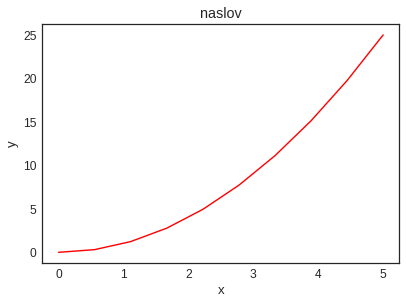

In [6]:
figure()
plot(x, y, 'r')
xlabel('x')
ylabel('y')
title('naslov')
show()

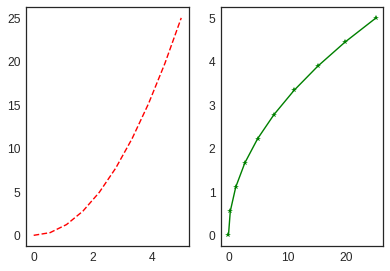

In [7]:
# stavljamo ; na kraj zadnjeg retka da se ne ispišu dodatne informacije
subplot(1,2,1)
plot(x, y, 'r--')
subplot(1,2,2)
plot(y, x, 'g*-');

Taj način pisanje je dobar za jednostavne stvari, ali za kompleksnije primjere bolje je koristiti Matplotlib objektno sučelje. U sljedećem primjeru ćemo nacrtati istu sliku, ali ćemo sliku spremiti u `fig` varijablu.

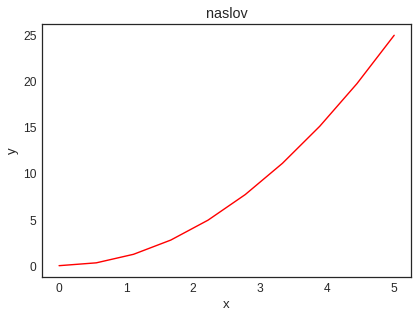

In [8]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # lijevo, dolje, širina, visina (raspon od 0 do 1)
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('naslov');

Kod jest malo kompliciraniji, ali sada možemo lako modificirati sliku.

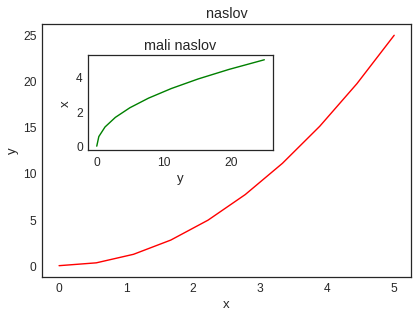

In [9]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # glavne osi
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # unutarnje osi
# glavna slika
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('naslov')
# unutarnja slika
axes2.plot(y, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('mali naslov');

Ako ne želimo sami definirati mjesta za podslike, možemo korisititi (kao što smo već viđali) `subplots`:

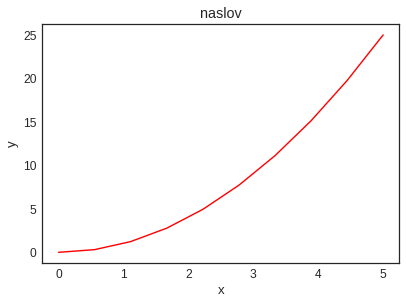

In [10]:
fig, axes = plt.subplots()
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('naslov');

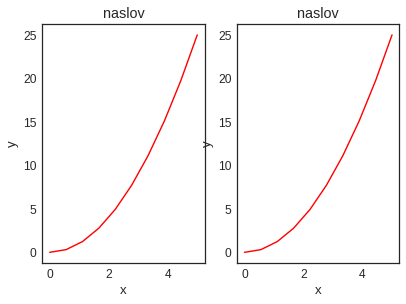

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('naslov');

Oznaka za y os dodiruje prvu sliku, što nije lijepo.

Koristeći `fig.tight_layout` metodu, koja automatski namješta da se tako što ne dogodi, lako riješavamo taj problem.

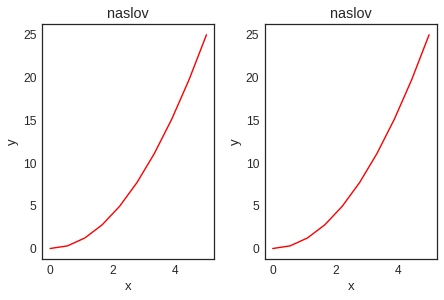

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('naslov')    
fig.tight_layout()

## Veličina slike, rezolucija

`figsize` je par (širina, visina) u inčima, a `dpi` je rezolucija u točkama (pikselima) po inču.

In [13]:
fig = plt.figure(figsize=(8,4), dpi=100)

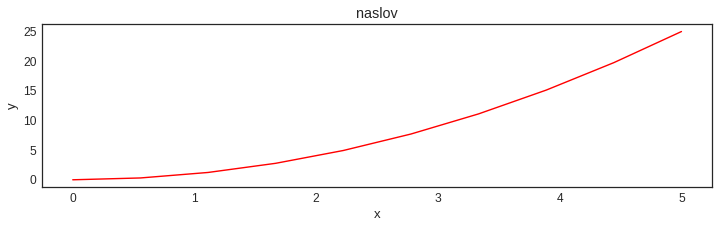

In [14]:
fig, axes = plt.subplots(figsize=(12,3))
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('naslov');

In [15]:
# analogno možemo promijeniti veličinu svih slika na sljedeći način 
from IPython.core.pylabtools import figsize
figsize(8,4)

## Spremanje slika

In [16]:
fig.savefig("ime.png")

Ili s više parametara:

In [17]:
fig.savefig("ime.png", dpi=200)

In [18]:
fig.savefig("ime.svg")

Koje formate možemo koristiti? Sve osnovne: PNG, JPG, EPS, SVG, PDF. PDF je vrlo praktičan format za uključivanje u PDF dokumente (recimo one kreirane u $\LaTeX$u).

**Naslovi**

In [19]:
ax.set_title("naslov")

**Koordinatne osi**

In [20]:
ax.set_xlabel("x")
ax.set_ylabel("y")

**Legende**

In [21]:
ax.legend(["krivulja1", "krivulja2", "krivulja3"]);

Ovo je malo nespretno jer trebamo voditi računa o tome kad se koja krivulja ubacila u sliku. Bolje je biti eksplicitan:

In [22]:
ax.plot(x, x**2, label="krivulja1")
ax.plot(x, x**3, label="krivulja2")
ax.legend();

Lokacija legende se isto može definirati, za detalje vidi [http://matplotlib.org/users/legend_guide.html#legend-location](http://matplotlib.org/users/legend_guide.html#legend-location):

In [23]:
ax.legend(loc=0) # automatski
ax.legend(loc=1) # gore desno
ax.legend(loc=2) # gore lijevo
ax.legend(loc=3) # dolje lijevo
ax.legend(loc=4) # dolje desno
# .. ima i drugih mogućnosti

Primjer:

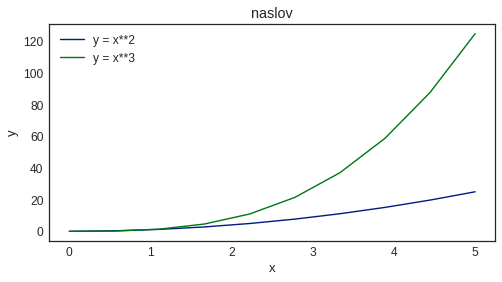

In [24]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('naslov')
ax.legend(loc=2);

### Formatiraje teksta, $\LaTeX$

Stavljamo `r` ispred stringa da kažemo Pythonu da ćemo koristiti *raw string*. Inače bi, kako je \ escape znak u Pythonu, morali paziti na takve stvari.

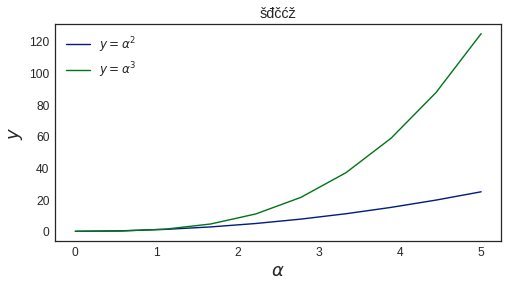

In [25]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('šđčćž')
ax.legend(loc=2);

Parametre koje ćemo uvijek koristiti možemo definirati kao globalne:

In [26]:
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'serif'})

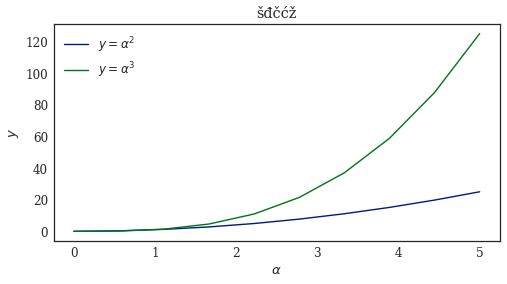

In [27]:
fig, ax = plt.subplots()
ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$y$')
ax.set_title('šđčćž')
ax.legend(loc=2);

In [28]:
# sad ćemo vratiti natrag defaultne vrijednosti
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'sans'})

### Boje

In [29]:
# kao u MATLAB-u
ax.plot(x, x**2, 'b.-') # plava istočkana
ax.plot(x, x**3, 'g--') # zelena iscrtkana

Ali boje se mogu i puno preciznije definirati kao u HTML-u.

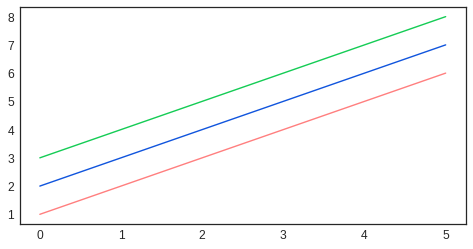

In [30]:
fig, ax = plt.subplots()
ax.plot(x, x+1, color="red", alpha=0.5) # polutransparentna crvena
ax.plot(x, x+2, color="#1155dd")        
ax.plot(x, x+3, color="#15cc55");

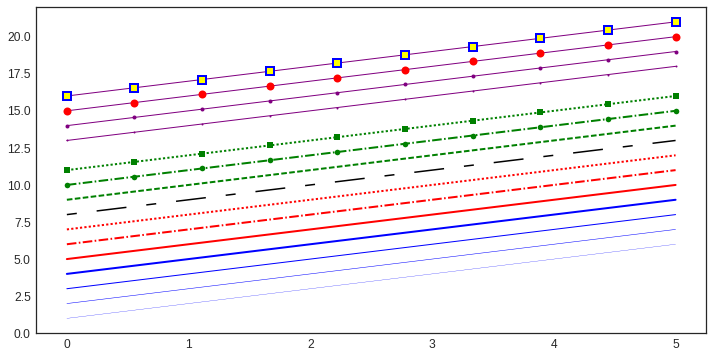

In [31]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)
# moguće linestype opcije ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: duljina linije, duljina praznine ...
# marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='-.', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls=':', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='', marker='1')
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

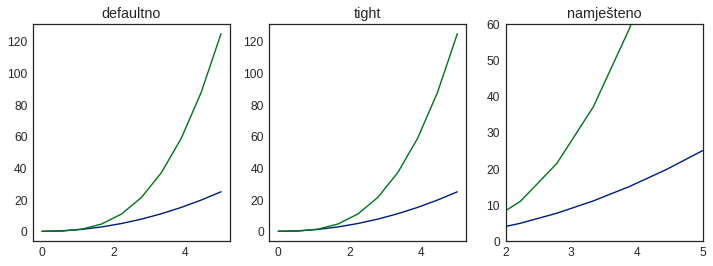

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("defaultno")
axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight")
axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("namješteno");

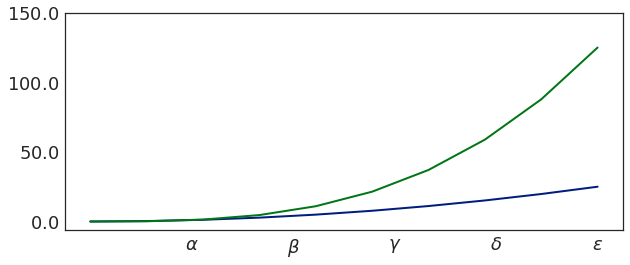

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, x**2, x, x**3, lw=2)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)
yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
# dolje koristimo LaTeX pri formatiranju!
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18);

Za još više detalja vidi: [http://matplotlib.org/api/ticker_api.html](http://matplotlib.org/api/ticker_api.html).

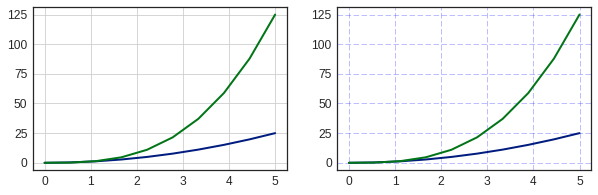

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10,3))
# defaultna mreža
axes[0].plot(x, x**2, x, x**3, lw=2)
axes[0].grid(True)
axes[1].plot(x, x**2, x, x**3, lw=2)
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)

Možemo imate koordinatne osi na svakoj strani pomoću `twinx` i `twiny` funkcija:

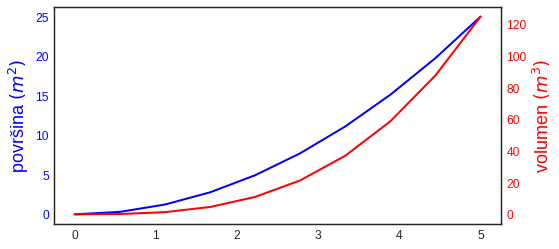

In [35]:
fig, ax1 = plt.subplots()
ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"površina $(m^2)$", fontsize=18, color="blue") # unicode & raw
for label in ax1.get_yticklabels():
    label.set_color("blue")    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volumen $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

Tipični izgled grafa u (teorijskoj) matematici:

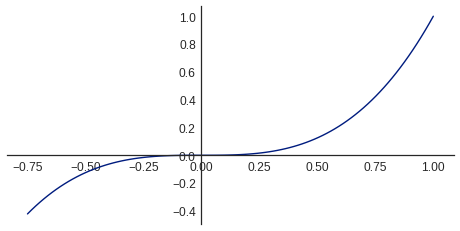

In [36]:
# koordinatne osi = spines
fig, ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # pozicija x-osi je x=0
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # pozicija y-osi je y=0
xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

Osim funkcije `plot`, postoje i druge funkcije. Galeriju možete pogledati [ovdje](http://matplotlib.org/gallery.html). Neke od njih ćemo prikazati dolje.

In [37]:
n = array([0,1,2,3,4,5])

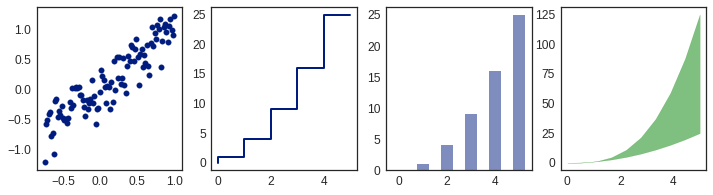

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(12,3))
axes[0].scatter(xx, xx + 0.25*randn(len(xx)))
axes[1].step(n, n**2, lw=2)
axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

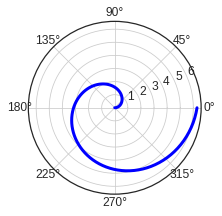

In [39]:
# polarne koordinate i polarna projekcija
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = linspace(0, 2 * pi, 100)
ax.plot(t, t, color='blue', lw=3);

Za ubacivanje tekst u sliku koristimo `text` funkciju. Ona podržava $\LaTeX$:

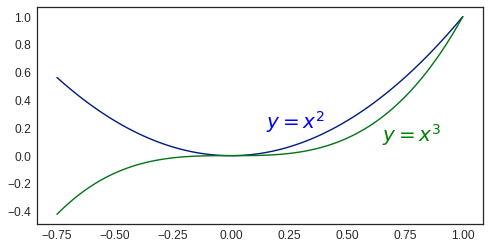

In [40]:
fig, ax = plt.subplots()
ax.plot(xx, xx**2, xx, xx**3)
ax.text(0.15, 0.2, r"$y=x^2$", fontsize=20, color="blue")
ax.text(0.65, 0.1, r"$y=x^3$", fontsize=20, color="green");

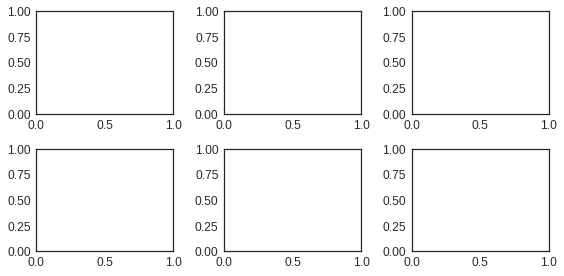

In [41]:
# podslike pomoću funkcije subplots
fig, ax = plt.subplots(2, 3)
fig.tight_layout()

#### subplot2grid

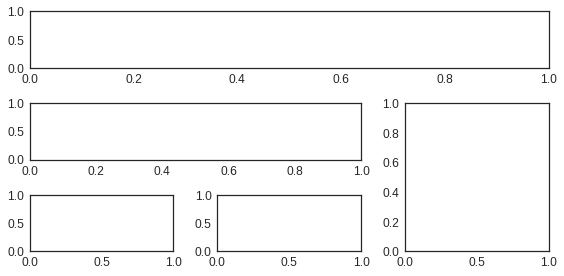

In [42]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()

#### gridspec

In [43]:
import matplotlib.gridspec as gridspec

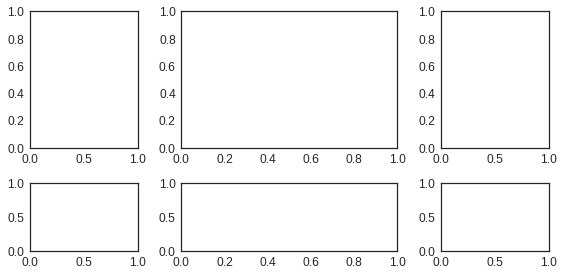

In [44]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 3, height_ratios=[2,1], width_ratios=[1,2,1])
for g in gs:
    ax = fig.add_subplot(g)    
fig.tight_layout()

Pomoću `add_axes` je jednostavno ubacivate manje slike u veće.

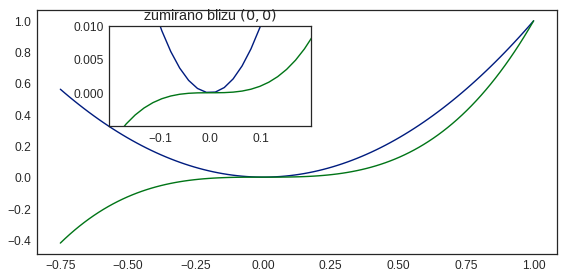

In [45]:
fig, ax = plt.subplots()
ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()
# manja slika
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, širina, visina
inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title(r'zumirano blizu $(0,0)$')
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

Kolor mape:
[http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps](http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps)

In [46]:
alpha = 0.7
phi_ext = 2 * pi * 0.5
def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

In [47]:
phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

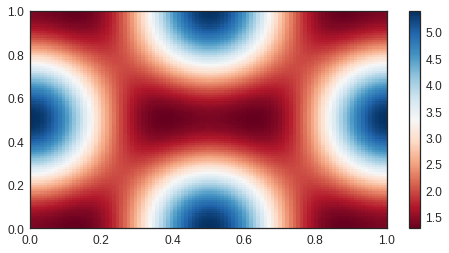

In [48]:
fig, ax = plt.subplots()
p = ax.pcolor(X/(2*pi), Y/(2*pi), Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

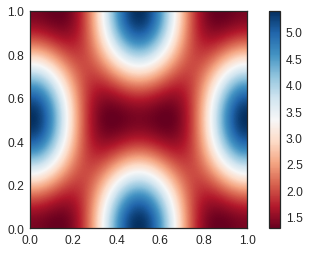

In [49]:
fig, ax = plt.subplots()
im = imshow(Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax)

#### contour

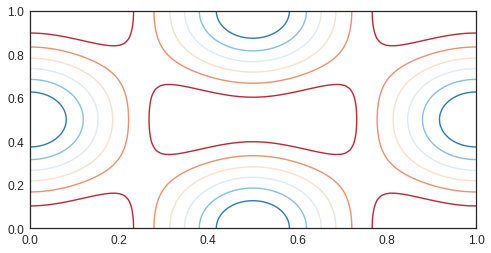

In [50]:
fig, ax = plt.subplots()
cnt = contour(Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D 

In [51]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Plohe

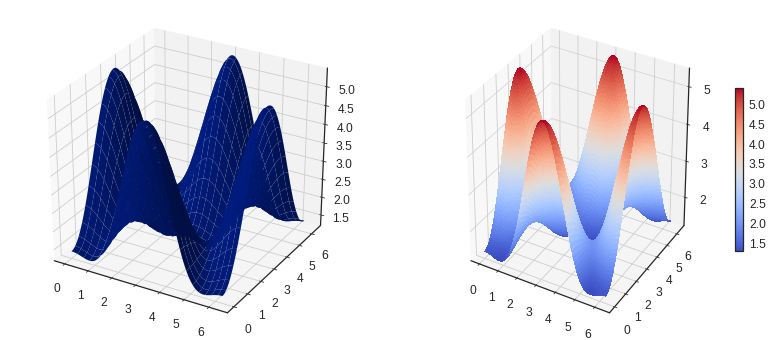

In [52]:
fig = plt.figure(figsize=(14,6))
# ax je sada 3D zbog projection='3d'
ax = fig.add_subplot(1, 2, 1, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

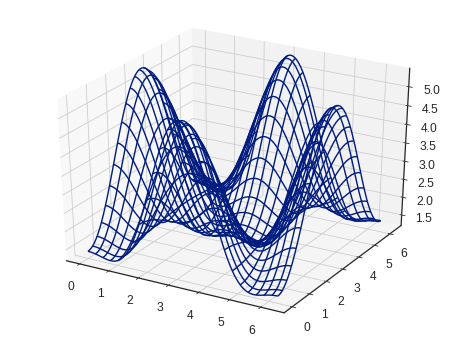

In [53]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

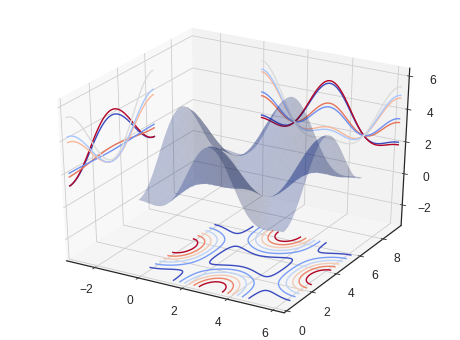

In [54]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=cm.coolwarm)
ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);

Pomoću `view_init` funkcije možemo definirati iz koje točke gledamo objekt. Parametri su kut elevacije i azimut:

In [55]:
from IPython.display import Image
Image(url='http://aquillam.files.wordpress.com/2010/01/image001.gif')

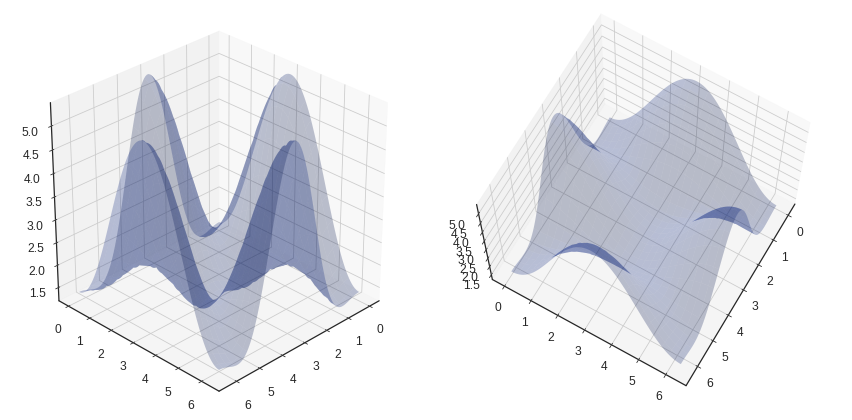

In [56]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)
ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)
fig.tight_layout()

## Animacije

Matplotlib nudi jednostavan API za animaciju. Funkcija `FuncAnimation` generira film kao niz slika. 

(Neki) parametri:

+ `fig` slika koje će se animirati, 
+ `animate` funkcija s kojom mijenjamo sliku, 
+ `init_func` funkcija za postavu, 
+ `interval` koliko milisekundi između dca frame-a, 
+ `blit` postavka da se mijenjaju samo promijenjeni dijelovi slike.

Primjer upotrebe ćemo vidjeti u nastavku.

S funkcijom `save` spremamo animaciju.

    anim.save('animation.mp4', fps=30) # fps = broj sekvenci u sekundi

Modul je `matplotlib.animation`.

In [57]:
from matplotlib import animation

In [58]:
# dvostruko njihalo

from scipy.integrate import odeint

g = 9.82; L = 0.5; m = 0.1

def dx(x, t):
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]
    
    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * cos(x1-x2) * x4)/(16 - 9 * cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * cos(x1-x2) * x3)/(16 - 9 * cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * sin(x1-x2) + 3 * (g/L) * sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * sin(x1-x2) + (g/L) * sin(x2))
    return [dx1, dx2, dx3, dx4]

x0 = [pi/2, pi/2, 0, 0]  # početno stanje
dt = 0.05
t = np.arange(0.0, 20, dt) # vremena
x = odeint(dx, x0, t)    # rješenje ODJ
# razdvojimo koordinate
x1 = L * sin(x[:,0])
y1 = -L * cos(x[:,0])
x2 = x1 + L * sin(x[:,1])
y2 = y1 - L * cos(x[:,1])

Generiranje animacije:

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

#line, = ax.plot([], [], 'o-', lw=2)
pendulum1, = ax.plot([], [], 'o-', color="red", lw=2)
pendulum2, = ax.plot([], [], 'o-', color="blue", lw=2)
time_template = 'vrijeme = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    pendulum1.set_data([], [])
    pendulum2.set_data([], [])
    time_text.set_text('')
    return pendulum1, pendulum2, time_text


def animate(i):

    pendulum1.set_data([0,x1[i]], [0,y1[i]])
    pendulum2.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    time_text.set_text(time_template % (i*dt))
    return pendulum1,pendulum2, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(x)),
                              interval=25, blit=True, init_func=init)

ani.save('animation.mp4', fps=15)
plt.close(fig)

In [60]:
# možda neće raditi u svim browserima, u Chrome 57 hoće...
from IPython.display import HTML
from base64 import b64encode
video = open("animation.mp4", "rb").read()
video_encoded = b64encode(video).decode('ascii')
video_tag = """<video controls> 
<source src="data:video/mp4;base64,{0}" type="video/mp4"> 
</video>""".format(video_encoded)
HTML(data=video_tag)

In [61]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In [62]:
from verzije import *
from IPython.display import HTML
HTML(print_sysinfo()+info_packages('matplotlib,IPython,numpy,scipy'))

Python verzija,3.5.3
kompajler,GCC 4.8.2 20140120 (Red Hat 4.8.2-15)
sustav,Linux
broj CPU-a,8
interpreter,64bit
matplotlib verzija,2.0.0
IPython verzija,5.3.0
numpy verzija,1.11.3
scipy verzija,0.19.0


# Zadaci za vježbu

- Napišite funkciju koja za ulazni parametar prima niz brojeva $v_0$ te crta odgovarajuće krivulje $y(t) = v_0t − 0.5gt^2$ na istoj slici (ovdje je $g = 9.81$). Neka je $t \in [0,2v_0/g]$ za svaku krivulju. 
- Modificierajte prethodnu funkciju tako da izračunate ekstremalne vrijednosti za $t$ i $y$ osi te prilagodite tim podacima izgled slike.
- Nacrtajte plohu $z=\sin\sqrt{x^2+y^2}$.
- Animirajte aproksimaciju funkcije Taylorovim polinomima. Naprimjer za funkciju $\mathrm{e}^x$.
- Vizualizirajte numeričku integraciju (uputa: pogledajte što radi Matplotlibova funkcija `fill_between`).

- Nacrtajte sljedeću sliku ![](zad.png)